In [1]:
from glob import glob
import pandas as pd

In [2]:
# Opción que deshabilita el limite de columnas y filas mostradas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

---
## Carga de data Google

In [2]:
# Path de los archivos no-procesados (formato parquet)
path_data = '../data/raw'

### `g-sitios.parquet`

In [3]:
df_sitios = pd.read_parquet(f'{path_data}/g-sitios.parquet')

### `g-review.parquet`

In [ ]:
# Crear lista de archivos en /data/raw/g-review/
review_parquets = glob(f'{path_data}/g-review/*')
review_parquets

In [ ]:
# Crear dataframe donde se unen los datos extraidos de parquet
df_review = pd.DataFrame()
# Iterar por cada parquet dentro de /data/raw/g-review/
for p in review_parquets:
    # Leer parquet
    df = pd.read_parquet(p)
    # Unir a df_review
    df_review = pd.concat([df_review, df], ignore_index=True)

---
## Análisis Exploratorio

In [ ]:
# 

## Mapa

In [4]:
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [5]:
df_sitios.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')

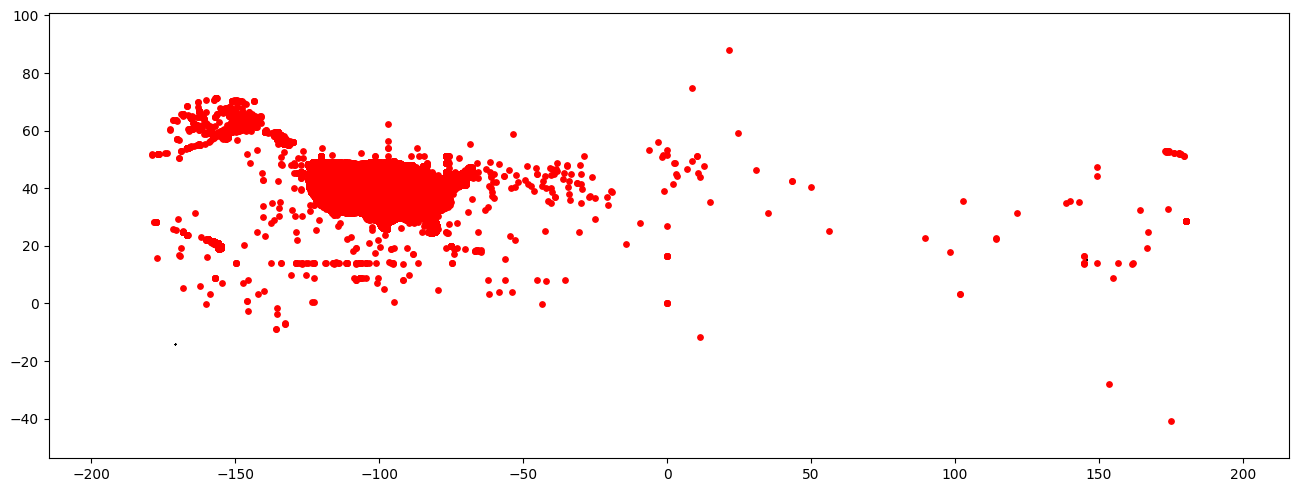

In [6]:
# Mapeamos las coordinadas de 'pos_x' y 'pos_y'
# Descartamos los nulos
df = df_sitios.dropna(axis=0, subset=['longitude', 'latitude'])

# Crear un GeoDataFrame con la data de coordinadas
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

# Cargar archivo shapefile
mapa = gpd.read_file('../assets/map_urban_500k.shx')

# Calculamos los limites del mapa
minx, miny, maxx, maxy = gdf.total_bounds

# Creamos los plots del mapa
fig, ax = plt.subplots(figsize=(16, 14))
mapa.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

# Calculamos el margen del grafico
margin_ratio = 0.1
marginx = (maxx - minx) * margin_ratio
marginy = (maxy - miny) * margin_ratio
# Aplicamos los margenes en relacion a los plots en los extremos
ax.set_xlim(minx - marginx, maxx + marginx)
ax.set_ylim(miny - marginy, maxy + marginy)

plt.show()